In [1]:
#Importing packages
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [22]:
df = pd.read_csv('train.csv')
df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0.0
6,6,2013-01-01,1,CELEBRATION,0.0,0.0
7,7,2013-01-01,1,CLEANING,0.0,0.0
8,8,2013-01-01,1,DAIRY,0.0,0.0
9,9,2013-01-01,1,DELI,0.0,0.0


In [34]:
df.describe()


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,3.460289e+01
std,8.662819e+05,1.558579e+01,1.101998e+03,9.948216e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,1.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,1.600000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,1.006000e+03


In [35]:
df.describe(include=['object'])


,date,family
count,3000888,3000888
unique,1684,33
top,2014-01-22,MEATS
freq,1782,90936


In [69]:
family = df.loc[df['family'] == "BEAUTY"]
family.head()

,id,date,store_nbr,family,sales,onpromotion
2,2,2013-01-01,1,BEAUTY,0.0,0.0
35,35,2013-01-01,10,BEAUTY,0.0,0.0
68,68,2013-01-01,11,BEAUTY,0.0,0.0
101,101,2013-01-01,12,BEAUTY,0.0,0.0
134,134,2013-01-01,13,BEAUTY,0.0,0.0


In [70]:
family['date'].min(), family['date'].max()


(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [83]:
#Taking a new dataframe with only Order Date and Sales columns.
family_new = family[['date', 'sales']]
#Sorting the dataframe by order date
family = family.sort_values('date')
#Inspecting for missing values
family.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [101]:
family1 = family_new.groupby('date')['sales'].sum().reset_index()


In [102]:
family1.head(10)

,date,sales
0,2013-01-01,2.0
1,2013-01-02,207.0
2,2013-01-03,125.0
3,2013-01-04,133.0
4,2013-01-05,191.0
5,2013-01-06,265.0
6,2013-01-07,124.0
7,2013-01-08,116.0
8,2013-01-09,104.0
9,2013-01-10,96.0


In [103]:
#Setting Order Date as index
family1 = family1.set_index('date')
family1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

In [104]:

y = family1['sales'].resample('M').mean()
y.head()

date
2013-01-31    129.645161
2013-02-28    133.821429
2013-03-31    125.838710
2013-04-30    122.333333
2013-05-31    119.870968
Freq: M, Name: sales, dtype: float64

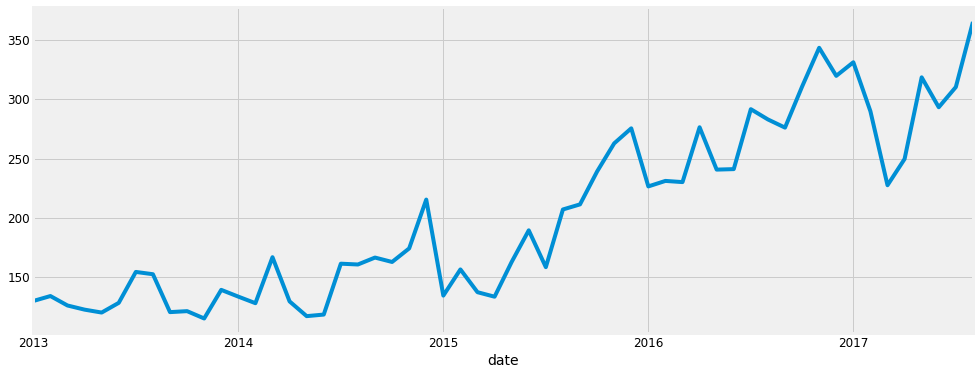

In [105]:
y.plot(figsize=(15, 6))
plt.show()

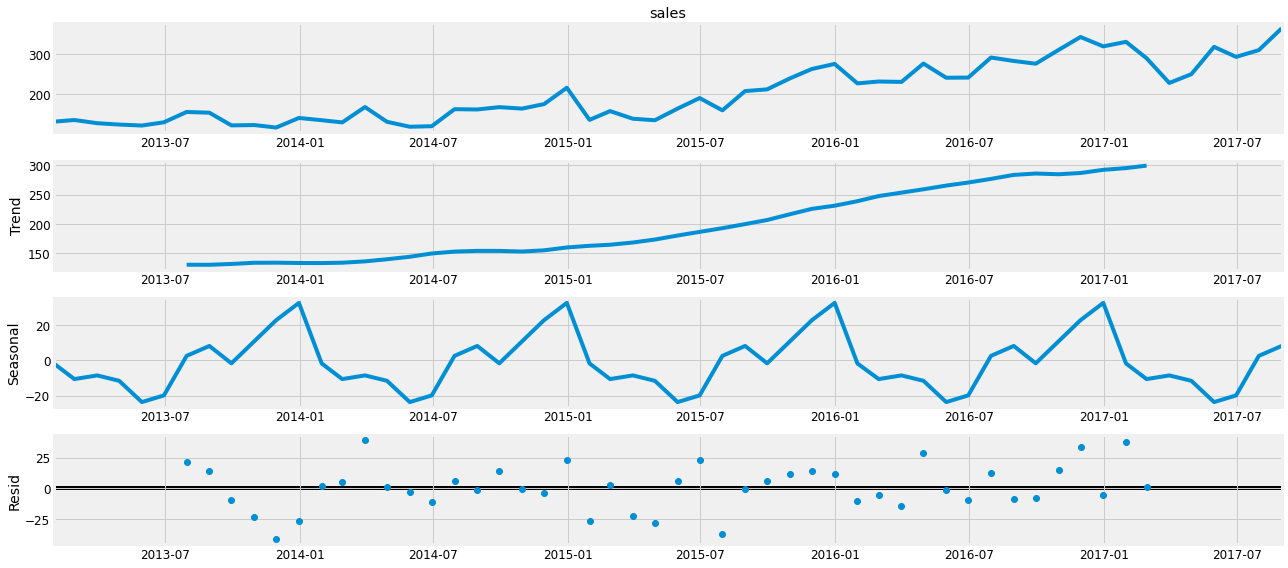

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [109]:
#Setting seasonality, trend and noise parameters 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))


In [112]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



In [113]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:749.3728981965759
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:565.5139178953087
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:480.2064727183423


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1180.6173886236622
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:456.74860012023436
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:437.432730925594
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:356.84207807380756


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1309.7874892367638
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:677.4373991688453
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:512.0052714013832
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:451.4497561680681
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1244.0863647377234
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:453.1729771249515
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:424.95624299910276
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:350.2348970678424


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1257.587998238025
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:523.6464813500533
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:418.0281285385057
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:436.6230795929486


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1217.5598805700106
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:426.9108133246338
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:418.92301449213323
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:317.2395426124298
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:309.45208769860596
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:513.9936506544946
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:407.3145356194969
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:414.3416736258909


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:887.983831271404
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:425.55971909423863
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:407.83676092888106
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75660303858837
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:293.5348039294095
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:533.8045237185585
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:428.6518225425599
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:443.58961518963474

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1285.355910228981
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:442.3645636224003
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:433.46345834249763
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:318.7769481406317


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1250.5646522157595
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:522.9256819412349


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:417.9482832350467
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:426.511413679966


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1219.18037890406
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:426.08837394814833
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:424.3645912578748
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:312.50953183744224


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1180.084383417401
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:523.7987605741378
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:418.4638705511572
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:432.3238397193998


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1283.4375854036234
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:418.18620832654295
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:419.50902599088056
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:305.1673886981782
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:306.99293242391354
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:514.9609330660378
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:408.8192226815543
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:416.1692214132345


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1250.9472348440147
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:418.19061751595825
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:409.2635714110916
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:303.33385970939804
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:295.5326026681118


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0080      0.420     -0.019      0.985      -0.830       0.814
ma.L1         -0.5742      0.360     -1.597      0.110      -1.279       0.131
ar.S.L12      -0.6009      0.269     -2.232      0.026      -1.129      -0.073
sigma2      1099.6005    392.177      2.804      0.005     330.949    1868.253


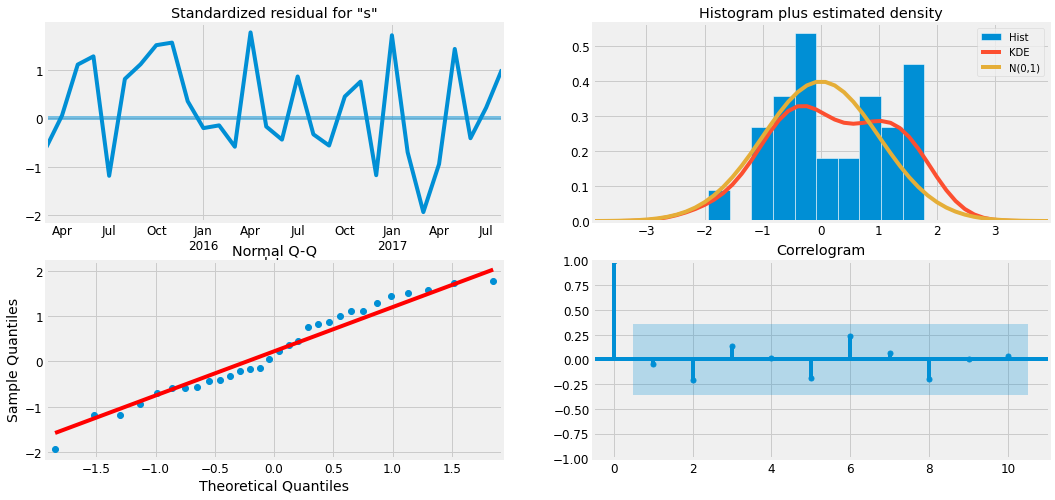

In [162]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# MODEL VALIDATION

### Model doğruluğunu anlamak için 2013 yılına ait satış değerlerini tahmin edeceğiz. Ardından, 2013 yılına ait gerçek satış verileriyle karşılaştıracağız ve doğruluğunu bulacağız.

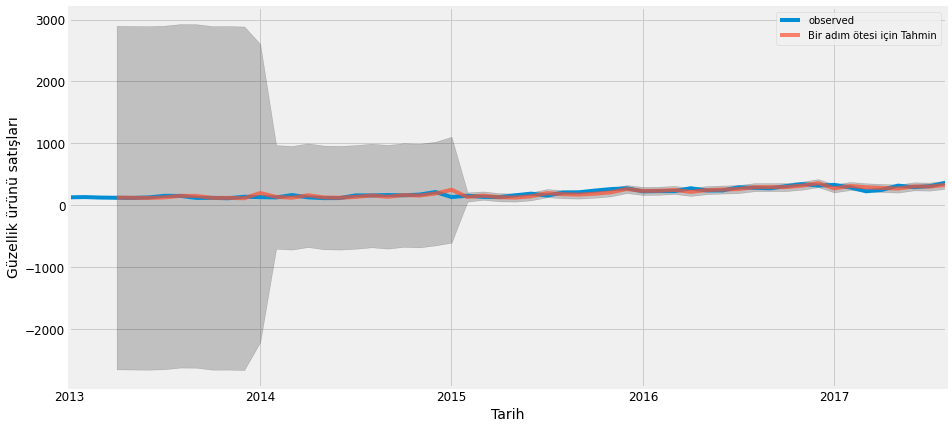

In [187]:
pred = results.get_prediction(start=pd.to_datetime('2013-04-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Bir adım ötesi için Tahmin', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tarih')
ax.set_ylabel('Güzellik ürünü satışları')
plt.legend()
plt.show()

In [188]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-04-30':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print(mse)
rmse = format(round(np.sqrt(mse), 2))
print(rmse)

1130.7453331666338
33.63


# BEAUTY future sales

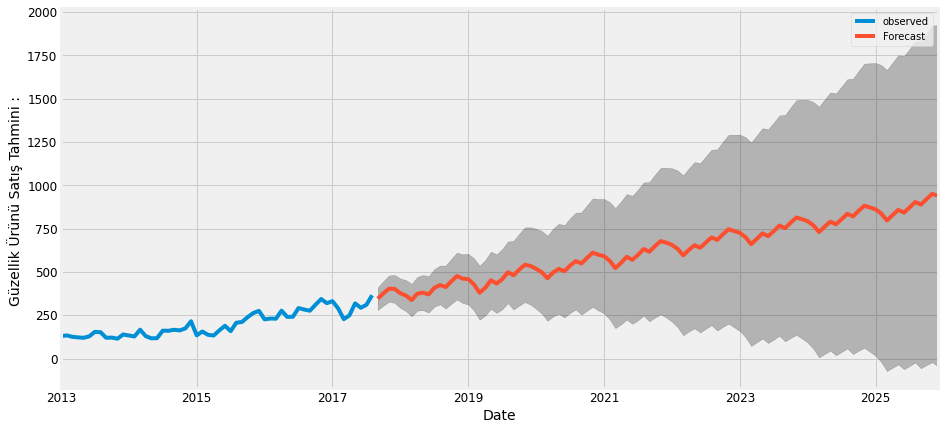

In [182]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Güzellik Ürünü Satış Tahmini : ')
plt.legend()
plt.show()

In [189]:
y_forecasted = pred.predicted_mean
print(y_forecasted)


date
2013-04-30    125.873334
2013-05-31    122.348382
2013-06-30    119.881573
2013-07-31    128.031143
2013-08-31    154.080561
2013-09-30    152.266862
2013-10-31    120.371955
2013-11-30    121.060406
2013-12-31    114.893516
2014-01-31    199.392979
2014-02-28    136.724718
2014-03-31    122.270392
2014-04-30    163.832704
2014-05-31    127.855971
2014-06-30    122.685702
2014-07-31    136.481450
2014-08-31    159.606831
2014-09-30    138.080341
2014-10-31    166.643928
2014-11-30    158.344323
2014-12-31    190.722417
2015-01-31    252.453258
2015-02-28    134.893925
2015-03-31    157.657298
2015-04-30    131.210041
2015-05-31    125.555773
2015-06-30    146.688408
2015-07-31    197.601550
2015-08-31    179.894340
2015-09-30    174.116588
2015-10-31    188.782521
2015-11-30    210.797774
2015-12-31    263.749820
2016-01-31    233.097886
2016-02-29    235.878893
2016-03-31    249.516127
2016-04-30    217.424899
2016-05-31    246.226285
2016-06-30    255.620580
2016-07-31    262.93

In [193]:
print(pred_ci.index)

DatetimeIndex(['2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31',
               '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30',
               '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31',
               '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31',
               '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30',
               '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31',
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31'],
              dtype='datetime64[ns]', name='dat

In [198]:
print(pred_uc.predicted_mean)

2017-09-30    345.734155
2017-10-31    376.400219
2017-11-30    403.768678
2017-12-31    401.960662
2018-01-31    377.053742
                 ...    
2025-08-31    903.436075
2025-09-30    888.480766
2025-10-31    920.613387
2025-11-30    949.983113
2025-12-31    940.097740
Freq: M, Name: predicted_mean, Length: 100, dtype: float64


In [199]:
pred_uc.predicted_mean.to_csv('ArimaPredsubmission.csv', index=False)
print("submission successed")

submission successed
